# **The objective is to use the Mask RCNN technique, for instance segmentation on the COCO dataset**

As per  project it was required to you Detectron Model ( 'https://github.com/facebookresearch/Detectron.git' ) . But while working on it understood that Detectron is deprecated and not supported on google collab. Alternate option was to  use Detectron2 ( https://github.com/facebookresearch/detectron2 ) which is the revised one and recommanded by Facebook.  

************************************* START OF PROJECT *****************************************

Install dependency.

In [1]:
!pip install pyyaml

In [2]:
import torch, torchvision

In [3]:
print(torch.__version__)
!gcc --version

2.0.1+cu118
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Install Detectron2 into runtime from github repository

In [11]:
import torch
import requests
import sys, os, distutils.core
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))


Cloning into 'detectron2'...
remote: Enumerating objects: 15185, done.
remote: Counting objects: 100% (206/206), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 15185 (delta 115), reused 113 (delta 66), pack-reused 14979
Receiving objects: 100% (15185/15185), 6.21 MiB | 19.16 MiB/s, done.
Resolving deltas: 100% (10984/10984), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=a8278882088a435a304e4eea63ee56c8f1480f804c023e8179c50027c4c9758

Verify that detectron2 is installed and dependency are loaded properly.

In [12]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118
detectron2: 0.6


In [13]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

Using Model: X-101-64x4d-FPN ( https://github.com/facebookresearch/Detectron/blob/main/MODEL_ZOO.md )


Model is already trained on coco dataset. For testing purpose, picked a image from Coco Database. ( http://cocodataset.org/#explore?id=44801 )





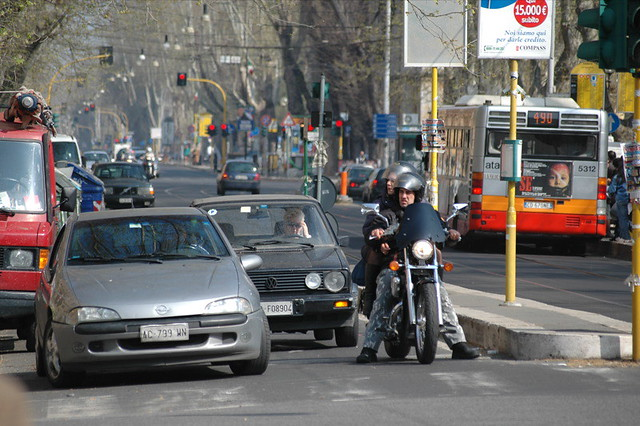

In [14]:
!wget http://cocodataset.org/#explore?id=44801 -q -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

Model related configs

In [15]:

cfg = get_cfg()
cfg.MODEL.DEVICE = 'cpu'
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[08/12 17:31:55 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl ...


model_final_2d9806.pkl: 431MB [00:04, 97.2MB/s]                          
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [16]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([2, 2, 2, 9, 2, 5, 0, 2, 2, 9, 2, 9, 9, 3, 2, 0, 2, 7, 0, 9, 0, 9, 9, 9,
        2, 9])
Boxes(tensor([[2.1627e+02, 1.6013e+02, 2.6121e+02, 1.9498e+02],
        [3.1782e+01, 2.0668e+02, 2.7608e+02, 3.8171e+02],
        [1.9429e+02, 1.9099e+02, 3.5767e+02, 3.4728e+02],
        [1.7658e+02, 7.2159e+01, 1.8641e+02, 8.6818e+01],
        [9.2683e+01, 1.6195e+02, 1.5559e+02, 2.0793e+02],
        [4.3761e+02, 9.4953e+01, 6.0760e+02, 2.4481e+02],
        [2.7964e+02, 2.0811e+02, 3.1175e+02, 2.3858e+02],
        [3.5820e+02, 1.6726e+02, 3.8775e+02, 2.0254e+02],
        [5.4984e+01, 1.5870e+02, 1.0687e+02, 2.0868e+02],
        [2.2042e+02, 1.2346e+02, 2.2782e+02, 1.3614e+02],
        [8.2642e+01, 1.5063e+02, 1.0993e+02, 1.7173e+02],
        [2.0684e+02, 1.2378e+02, 2.1718e+02, 1.3601e+02],
        [9.9770e+01, 4.6632e+01, 1.1313e+02, 6.6880e+01],
        [3.5820e+02, 1.9475e+02, 4.7435e+02, 3.6433e+02],
        [3.3115e+02, 1.6495e+02, 3.7377e+02, 1.9933e+02],
        [3.5724e+02, 1.7301e+

Visualize if image segmentation and masking is working as expected.

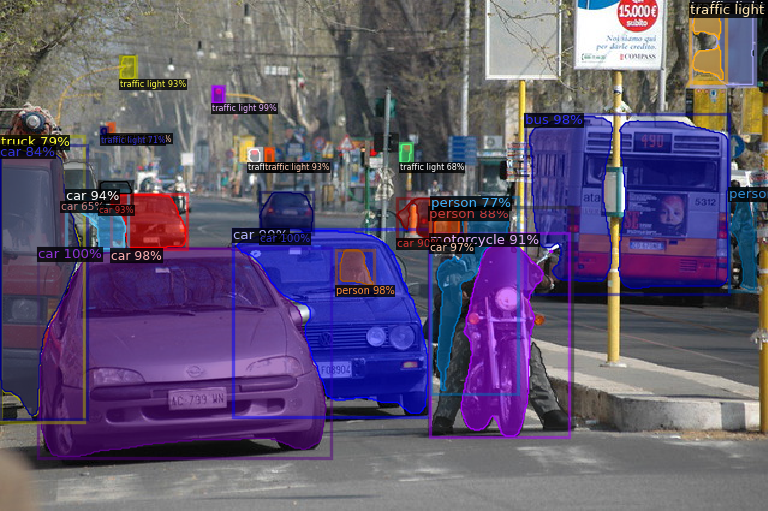

In [17]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

************************************* END OF PROJECT *****************************************